# ML Project Group Ivo, Salvo, Kevin

Kickstarter Project

## About Dataset
Kickstarter is a popular crowdfunding platform that has helped thousands of entrepreneurs and creators bring their innovative ideas to life. However, not all Kickstarter projects are successful, and understanding the factors that contribute to success or failure can be valuable for both creators and investors alike.

In this dataset, we have collected information on a large number of Kickstarter projects and whether they ultimately succeeded or failed to meet their funding goals. This dataset includes a wide range of project types, including technology startups, creative arts endeavors, and social impact initiatives, among others.

By analyzing this dataset, researchers and analysts can gain insights into the characteristics of successful and unsuccessful Kickstarter projects, such as funding targets, project categories, and funding sources. This information can be used to inform investment decisions and guide future crowdfunding campaigns.

Overall, this dataset provides a comprehensive look at the Kickstarter ecosystem and can serve as a valuable resource for anyone interested in understanding the dynamics of crowdfunding and the factors that contribute to project success or failure.

### Assumptions About the Data : 

**ID** Can be dropped or transformed - 

**Name** - maybe length of the name can be an indicator of how successfull it is founded - can be dropped initaly - no learing effect for model

**Category** - seems reasonable - keep

**Subcategorory** - every subcategory can be assigned to a Category - maybe drop for first analysis - "maybe hotencode subcategory and category"

**Country** - Self Explained - keep

**Launched** - how long are projects in "funding" ? - cut timestamp only keep date - keep

**Deadline** - maybe make prediction about how long it max takes for a project to be successfully funded ? - keep

**Goal**  drop NaN/Zero Values -> goal automatically reached at 0 / maybe cut outliers  / threshold maybe at 100/1000ish - keep

**Pledged** - always successfull when > goal - always "live" when deadline not met and < goal - always failed when < goal and deadline done - correaltes with state (target) column - keep

**Backers** - maybe not that relevant / shows popularity / - keep for now for further analysis ( might be dropped later)

**State** - Feature - keep



In [1]:
#load the data
import pandas as pd
data = pd.read_csv('data/kickstarter_projects.csv')

In [2]:
data.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [3]:
#check for missing values

data.isnull().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [4]:
#check data types
data.dtypes

ID              int64
Name           object
Category       object
Subcategory    object
Country        object
Launched       object
Deadline       object
Goal            int64
Pledged         int64
Backers         int64
State          object
dtype: object

In [5]:
#check unique values in "categories" column
data['Category'].unique()

array(['Fashion', 'Film & Video', 'Art', 'Technology', 'Journalism',
       'Publishing', 'Theater', 'Music', 'Photography', 'Games', 'Design',
       'Food', 'Crafts', 'Comics', 'Dance'], dtype=object)

In [6]:
#check unique values in "SubCategory" column
data['Subcategory'].unique()

array(['Fashion', 'Shorts', 'Illustration', 'Software', 'Journalism',
       'Fiction', 'Theater', 'Rock', 'Photography', 'Puzzles',
       'Graphic Design', 'Film & Video', 'Publishing', 'Documentary',
       'Sculpture', 'Electronic Music', 'Nonfiction', 'Food', 'Painting',
       'Indie Rock', 'Video Games', 'Public Art', 'Product Design', 'Art',
       "Children's Books", 'Crafts', 'Jazz', 'Music', 'Comics',
       'Narrative Film', 'Tabletop Games', 'Digital Art', 'Animation',
       'Conceptual Art', 'Pop', 'Hip-Hop', 'Country & Folk',
       'Periodicals', 'Webseries', 'Performance Art', 'Technology',
       'Art Books', 'World Music', 'Knitting', 'Classical Music',
       'Poetry', 'Graphic Novels', 'Radio & Podcasts', 'Design',
       'Hardware', 'Webcomics', 'Dance', 'Translations', 'Crochet',
       'Games', 'Photo', 'Mixed Media', 'Space Exploration', 'Photobooks',
       'Musical', 'Audio', 'Community Gardens', 'R&B',
       'Fabrication Tools', 'Textiles', 'Architecture',

In [7]:
#count unique values in "Subcategory" column
data['Subcategory'].nunique()

159

In [8]:
# range of the "Goal" column
data['Goal'].min(), data['Goal'].max()

(0, 166361391)

## First styling of the Dataset 
DROP ID and Timespam in "launched"

In [9]:
#drop ID Column    
data = data.drop(columns=['ID'])

In [10]:
#drop timestamp in "launched" column
data['Launched'] = pd.to_datetime(data['Launched']).dt.normalize()
data['Launched']
data['Deadline'] = pd.to_datetime(data['Deadline']).dt.normalize()
data['Deadline']

0        2009-05-31
1        2009-07-20
2        2009-05-03
3        2009-07-14
4        2009-05-26
            ...    
374848   2018-01-16
374849   2018-02-09
374850   2018-01-16
374851   2018-02-01
374852   2018-01-26
Name: Deadline, Length: 374853, dtype: datetime64[ns]

## Modeling baseline Dataset and Advaned Dataset

In [11]:
#create 2 different dataframes for a baseline model and an advanced model
baseline_data = data.copy()
advanced_data = data.copy()

In [12]:
# drop subcategory column for baseline model
baseline_data = baseline_data.drop(columns=['Subcategory'])
#drop backers in baseline model 
baseline_data = baseline_data.drop(columns=['Backers'])

In [13]:
baseline_data.head()

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,United States,2009-04-21,2009-05-31,1000,625,Failed
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,United States,2009-04-23,2009-07-20,80000,22,Failed
2,drawing for dollars,Art,United States,2009-04-24,2009-05-03,20,35,Successful
3,Offline Wikipedia iPhone app,Technology,United States,2009-04-25,2009-07-14,99,145,Successful
4,Pantshirts,Fashion,United States,2009-04-27,2009-05-26,1900,387,Failed


In [14]:
#nunique values in state column
baseline_data['State'].value_counts()

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [15]:
baseline_data.Country.value_counts()

Country
United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: count, dtype: int64

# EDA of Baseline Dataset

What to find out? 

- Category encoding - open
- Country encoding - Imbalance 70% USA? - open
- State Encoding - open
- Do we use the column "Names" and if yes, how? - open
- Project duration based on columns "Launched" und "Deadline" - Done -> created new column 'Project_Duration'
- Goal_Fulfillments - created new column based on column "Goal" und "Pledged"

---

- when goal 0 = successfull ? -> cut - Done
- "Canceled" state cuttable? - not cuttable
- Goal Threshold? - Done --> no threshold
- Suspended why? - Done -> dataframe was cut
- more successfull in country x? - Done -> different dependent on country -> kept column
- Top 10% Goals Failed or Successful? - Done
- Years with higher/lower successrates? -> Done -> relative similar rates -> not further relevant and therefore, dropped columns 'Launched' and 'Deadline'

In [16]:
#check for duplicates
baseline_data.duplicated().sum()

#show both duplicate rows
baseline_data[baseline_data.duplicated(keep=False)]

#drop duplicates for both datasets
baseline_data = baseline_data.drop_duplicates()
advanced_data = advanced_data.drop_duplicates()

In [17]:
#check if duplicates are dropped
baseline_data.duplicated().sum()

0

In [18]:
# check if duplicates are dropped
advanced_data.duplicated().sum()

0

In [19]:
baseline_data["State"].value_counts(normalize=True)

State
Failed        0.527168
Successful    0.357079
Canceled      0.103375
Live          0.007464
Suspended     0.004914
Name: proportion, dtype: float64

In [20]:
baseline_data["Country"].value_counts(normalize=True)

Country
United States     0.780619
United Kingdom    0.089825
Canada            0.039365
Australia         0.020912
Germany           0.011127
France            0.007840
Italy             0.007678
Netherlands       0.007651
Spain             0.006072
Sweden            0.004687
Mexico            0.004674
New Zealand       0.003860
Denmark           0.002969
Ireland           0.002164
Switzerland       0.002027
Norway            0.001889
Hong Kong         0.001649
Belgium           0.001646
Austria           0.001593
Singapore         0.001481
Luxembourg        0.000165
Japan             0.000107
Name: proportion, dtype: float64

<Axes: xlabel='Country'>

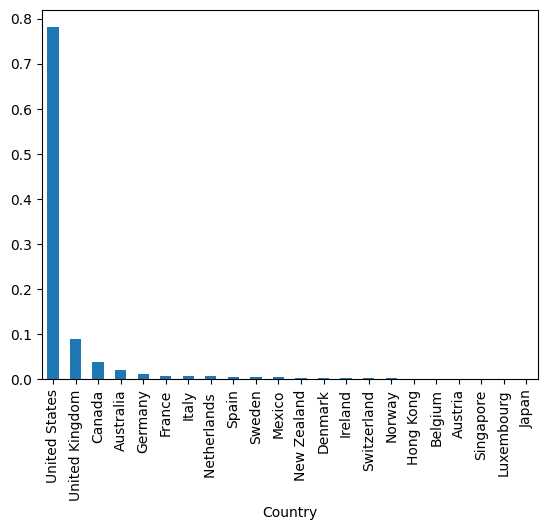

In [21]:
# Plot distribution of column 'Country' in percent
baseline_data["Country"].value_counts(normalize=True).plot(kind="bar")

In [22]:
# show rows with zero in goal column
baseline_data[baseline_data['Goal'] == 0]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State
1085,LOVELAND Round 6: A Force More Powerful,Art,United States,2009-11-25,2009-12-04,0,100,Successful
33831,"Word-of-mouth publishing: get ""Corruptions"" ou...",Publishing,United States,2011-11-07,2011-12-13,0,0,Canceled
40294,Nana,Film & Video,United States,2012-01-25,2012-03-16,0,0,Failed
316197,Bug's Big Adventure: Mexico Edition,Art,Mexico,2016-11-11,2016-11-12,0,16,Successful


In [23]:
# get rows with goal less than 100
baseline_data[baseline_data['Goal'] < 100]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State
2,drawing for dollars,Art,United States,2009-04-24,2009-05-03,20,35,Successful
3,Offline Wikipedia iPhone app,Technology,United States,2009-04-25,2009-07-14,99,145,Successful
48,Mr. Squiggles,Art,United States,2009-05-12,2009-05-22,30,0,Failed
88,Comic Remix,Comics,United States,2009-05-30,2009-06-15,60,72,Successful
338,"Video chat at 35,000 Feet",Film & Video,United States,2009-08-28,2009-08-31,12,19,Successful
...,...,...,...,...,...,...,...,...
374590,"I will draw you, normal edit or grime edit",Art,United States,2017-12-29,2018-02-27,50,4,Live
374661,Too Many Hours,Art,New Zealand,2017-12-30,2018-01-29,36,193,Live
374785,28mm Terrain for Tabletop Gaming,Games,United States,2018-01-01,2018-01-31,50,0,Live
374818,Make Earth Great Again #MEGA,Journalism,United States,2018-01-02,2018-01-26,17,27,Live


Roughly 1% of the total data has a goal smaller than 100 USD

In [24]:
# implement new column "Goal_Fulfillment" as a percentage for both datasets
baseline_data['Goal_Fulfillment'] = ((baseline_data['Pledged'] / baseline_data['Goal']) * 100).round(2)
advanced_data['Goal_Fulfillment'] = ((advanced_data['Pledged'] / advanced_data['Goal']) * 100).round(2)
baseline_data.head()

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,United States,2009-04-21,2009-05-31,1000,625,Failed,62.50
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,United States,2009-04-23,2009-07-20,80000,22,Failed,0.03
2,drawing for dollars,Art,United States,2009-04-24,2009-05-03,20,35,Successful,175.00
3,Offline Wikipedia iPhone app,Technology,United States,2009-04-25,2009-07-14,99,145,Successful,146.46
4,Pantshirts,Fashion,United States,2009-04-27,2009-05-26,1900,387,Failed,20.37


In [25]:
# also check advanced data
advanced_data.head()

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Goal_Fulfillment
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed,62.50
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed,0.03
2,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful,175.00
3,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful,146.46
4,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed,20.37


In [26]:
# add new column "Project_Duration_Days" for both datasets
baseline_data['Project_Duration_Days'] = (baseline_data['Deadline'] - baseline_data['Launched']).dt.days
advanced_data['Project_Duration_Days'] = (advanced_data['Deadline'] - advanced_data['Launched']).dt.days
baseline_data.head()

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,United States,2009-04-21,2009-05-31,1000,625,Failed,62.50,40
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,United States,2009-04-23,2009-07-20,80000,22,Failed,0.03,88
2,drawing for dollars,Art,United States,2009-04-24,2009-05-03,20,35,Successful,175.00,9
3,Offline Wikipedia iPhone app,Technology,United States,2009-04-25,2009-07-14,99,145,Successful,146.46,80
4,Pantshirts,Fashion,United States,2009-04-27,2009-05-26,1900,387,Failed,20.37,29


In [27]:
# check advanced data
advanced_data.head()

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Goal_Fulfillment,Project_Duration_Days
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed,62.50,40
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed,0.03,88
2,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful,175.00,9
3,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful,146.46,80
4,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed,20.37,29


In [28]:
# check numerical columns statistics
baseline_data.describe()

,Launched,Deadline,Goal,Pledged,Goal_Fulfillment,Project_Duration_Days
count,374850,374850,3.748500e+05,3.748500e+05,374848.00,374850.000000
mean,2014-09-25 22:44:08.240096256,2014-10-30 03:56:52.840335616,4.586414e+04,9.121146e+03,inf,34.217183
min,2009-04-21 00:00:00,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.00,1.000000
25%,2013-04-30 00:00:00,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,0.46,30.000000
50%,2014-12-02 00:00:00,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,13.43,30.000000
75%,2016-03-29 00:00:00,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,106.52,37.000000
max,2018-01-02 00:00:00,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,inf,92.000000
std,NaN,NaN,1.158783e+06,9.132090e+04,NaN,12.804846


In [29]:
# show inf values in "Goal_Fulfillment" column
baseline_data[baseline_data['Goal_Fulfillment'] == float('inf')]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
1085,LOVELAND Round 6: A Force More Powerful,Art,United States,2009-11-25,2009-12-04,0,100,Successful,inf,9
316197,Bug's Big Adventure: Mexico Edition,Art,Mexico,2016-11-11,2016-11-12,0,16,Successful,inf,1


In [30]:
# get rid of rows with inf values in "Goal_Fulfillment" column
baseline_data = baseline_data[baseline_data['Goal_Fulfillment'] != float('inf')]
advanced_data = advanced_data[advanced_data['Goal_Fulfillment'] != float('inf')]

In [31]:
# check descriptive statistics again
baseline_data.describe()

,Launched,Deadline,Goal,Pledged,Goal_Fulfillment,Project_Duration_Days
count,374848,374848,3.748480e+05,3.748480e+05,3.748460e+05,374848.000000
mean,2014-09-25 22:47:56.173809408,2014-10-30 04:00:54.242786560,4.586438e+04,9.121194e+03,3.222265e+02,34.217339
min,2009-04-21 00:00:00,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,2013-04-30 00:00:00,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,4.600000e-01,30.000000
50%,2014-12-02 00:00:00,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,1.343000e+01,30.000000
75%,2016-03-29 00:00:00,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,1.065200e+02,37.000000
max,2018-01-02 00:00:00,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,1.042780e+07,92.000000
std,NaN,NaN,1.158786e+06,9.132114e+04,2.674746e+04,12.804699


In [32]:
# check distribution of "Goal" column using decentiles
baseline_data['Goal'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.1      700.0
0.2     1500.0
0.3     2500.0
0.4     4000.0
0.5     5500.0
0.6     9000.0
0.7    12500.0
0.8    20469.6
0.9    46050.3
Name: Goal, dtype: float64

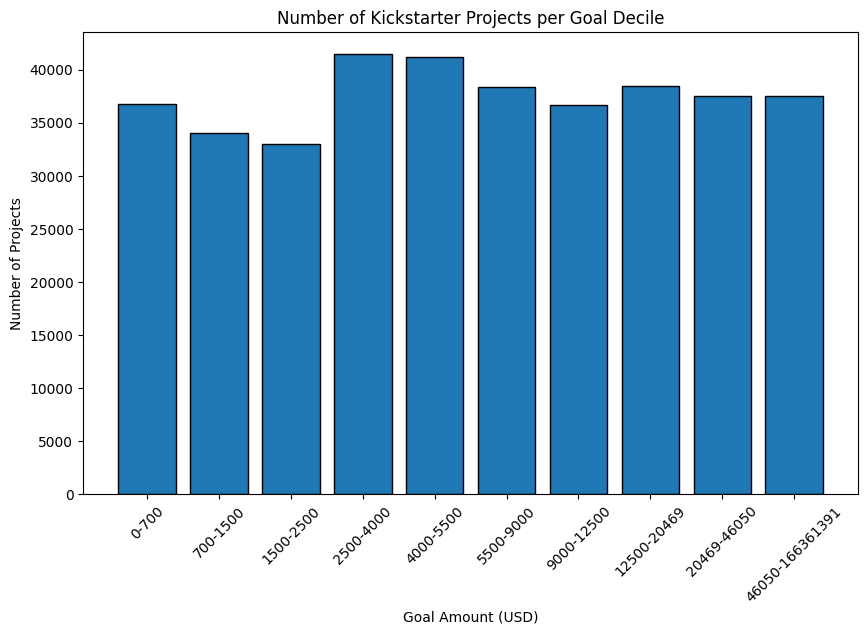

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Compute deciles
deciles = np.quantile(baseline_data['Goal'], np.linspace(0, 1, 11))

# Compute counts per decile
counts = []
for i in range(len(deciles)-1):
    count = ((baseline_data['Goal'] >= deciles[i]) & 
             (baseline_data['Goal'] < deciles[i+1])).sum()
    counts.append(count)

# Optional: include the max value in the last bin
counts[-1] += (baseline_data['Goal'] == deciles[-1]).sum()

# Bar positions (using the decile ranges as labels)
labels = [f'{int(deciles[i])}-{int(deciles[i+1])}' for i in range(len(deciles)-1)]

# Plot
plt.figure(figsize=(10,6))
plt.bar(labels, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Goal Amount (USD)')
plt.ylabel('Number of Projects')
plt.title('Number of Kickstarter Projects per Goal Decile')
plt.show()

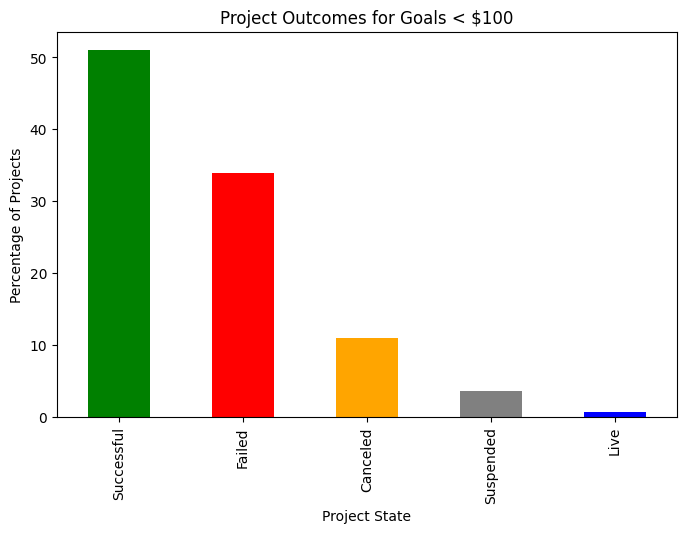

In [34]:
# Plot how many with a goal <100 USD are succesful in percentages
subset = baseline_data[baseline_data['Goal'] < 100]
success_counts = subset['State'].value_counts(normalize=True) * 100

# Map each label to a color
color_map = {
    'Successful': 'green',
    'Failed': 'red',
    'Canceled': 'orange',
    'Suspended': 'gray',
    'Live': 'blue'
}

# Create a list of colors in the same order as the value_counts index
colors = [color_map[label] for label in success_counts.index]

plt.figure(figsize=(8,5))
success_counts.plot(kind='bar', color=colors)
plt.xlabel('Project State')
plt.ylabel('Percentage of Projects')
plt.title('Project Outcomes for Goals < $100')
plt.show()

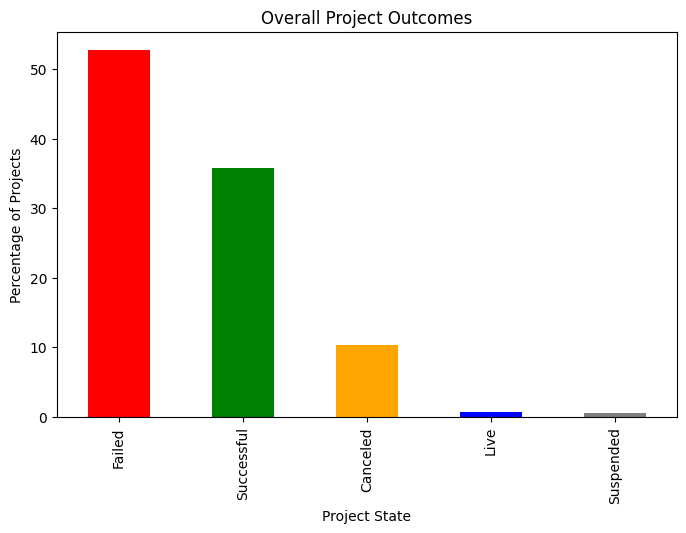

In [35]:
# Plot success rates for all projects in percent
overall_success_counts = baseline_data['State'].value_counts(normalize=True) * 100

# Create a list of colors in the same order as the value_counts index
colors_overall = [color_map[label] for label in overall_success_counts.index]

plt.figure(figsize=(8,5))
overall_success_counts.plot(kind='bar', color=colors_overall)
plt.xlabel('Project State')
plt.ylabel('Percentage of Projects')
plt.title('Overall Project Outcomes')
plt.show()

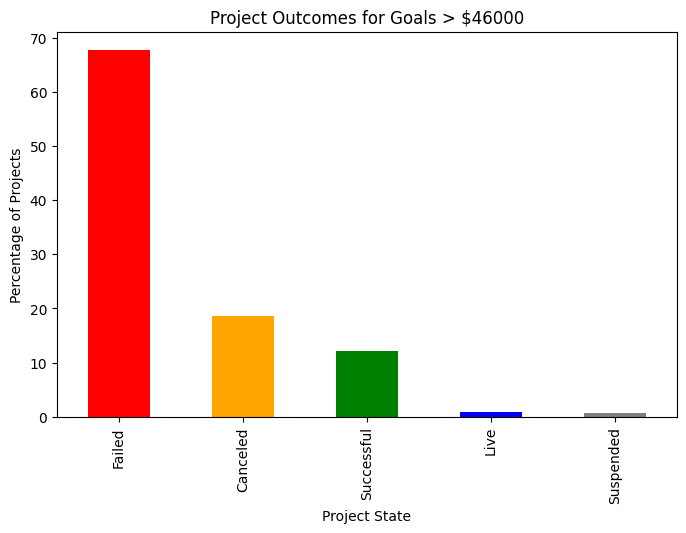

In [36]:
# Plot how many projects with a goal <100 USD are succesful in percentages
subset_big_boys = baseline_data[baseline_data['Goal'] > 46000]
success_counts_big_boys = subset_big_boys['State'].value_counts(normalize=True) * 100

# Create a list of colors in the same order as the value_counts index
colors_big_boys = [color_map[label] for label in success_counts_big_boys.index]

plt.figure(figsize=(8,5))
success_counts_big_boys.plot(kind='bar', color=colors_big_boys)
plt.xlabel('Project State')
plt.ylabel('Percentage of Projects')
plt.title('Project Outcomes for Goals > $46000')
plt.show()

We do not know the rules why a project gets suspended. Since we do not want to make any assumptions about this state and do not want it to create noise in the model, we decide to drop rows with the state "Suspended".

In [37]:
# Drop rows with state 'Suspended' in both datasets
baseline_data = baseline_data[baseline_data['State'] != 'Suspended']
advanced_data = advanced_data[advanced_data['State'] != 'Suspended']

In [38]:
# Check if 'Suspended' states are dropped in baseline data
baseline_data['State'].value_counts()

State
Failed        197609
Successful    133849
Canceled       38750
Live            2798
Name: count, dtype: int64

In [39]:
# Check if 'Suspended' states are dropped in advanced data
advanced_data['State'].value_counts()

State
Failed        197610
Successful    133849
Canceled       38750
Live            2798
Name: count, dtype: int64

In [40]:
# Check rows with state 'live' and 'Goal_Fulfillment' > 100% in baseline data
baseline_data[(baseline_data['State'] == 'Live') & (baseline_data['Goal_Fulfillment'] >= 100)]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
367924,The Evening Guests - Summerland LP,Music,United States,2017-11-03,2018-01-02,12000,12596,Live,104.97,60
367947,Tiddly Trailer Bar Co.,Food,United States,2017-11-03,2018-01-02,9500,9500,Live,100.00,60
368178,FRANTIC GOES WORLDWIDE !,Music,Belgium,2017-11-06,2018-01-05,4818,4926,Live,102.24,60
368201,Medieval Medicine: Humours!!,Music,United States,2017-11-06,2018-01-05,2000,2111,Live,105.55,60
368263,TT8 - The Best Wooden Multi-Functional Turntable,Technology,United States,2017-11-06,2018-01-03,25000,70731,Live,282.92,58
...,...,...,...,...,...,...,...,...,...,...
374792,Mobile Machine Learning: The Complete Masterclass,Technology,Canada,2018-01-01,2018-02-03,399,4475,Live,1121.55,33
374810,Magical Romance: Sailor Moon Couple Stained Gl...,Art,United Kingdom,2018-01-01,2018-01-21,887,1929,Live,217.47,20
374818,Make Earth Great Again #MEGA,Journalism,United States,2018-01-02,2018-01-26,17,27,Live,158.82,24
374822,100 Handmade Custom Shirts,Art,Mexico,2018-01-02,2018-01-17,26,31,Live,119.23,15


We assume that projects with the state 'Live', which are already completely funded (i.e. Goal_Fulfillment >= 100%) are succesful. Therefore, we change the state in all of the above rows.

In [41]:
# Replace rows with 'Goal_Fulfillment' > 100% and 'State' == 'Live' to 'Successful' in both datasets
baseline_data.loc[(baseline_data['State'] == 'Live') & (baseline_data['Goal_Fulfillment'] >= 100), 'State'] = 'Successful'
advanced_data.loc[(advanced_data['State'] == 'Live') & (advanced_data['Goal_Fulfillment'] >= 100), 'State'] = 'Successful'

The remaining rows with state = 'Live' do not provide any further information for the model build. Therefore, we will drop them as well.

In [42]:
# Drop all other rows with state 'Live' in both datasets
baseline_data = baseline_data[baseline_data['State'] != 'Live']
advanced_data = advanced_data[advanced_data['State'] != 'Live']

In [43]:
# Check values in state column after cleaning in baseline data
baseline_data['State'].value_counts()

State
Failed        197609
Successful    134290
Canceled       38750
Name: count, dtype: int64

In [44]:
# Check values in state column after cleaning in advanced data
advanced_data['State'].value_counts()

State
Failed        197610
Successful    134290
Canceled       38750
Name: count, dtype: int64

In [45]:
# Are there projects with the state = 'Canceled', which have a Goal_Fulfillment >= 100%?
baseline_data[(baseline_data['State'] == 'Canceled') & (baseline_data['Goal_Fulfillment'] >= 100)]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
58,Save the Ramzi (Canceled),Music,United States,2009-05-14,2009-06-15,1000,1190,Canceled,119.00,32
1106,Help Sex Piano Fund an EP (Canceled),Music,United States,2009-11-30,2010-02-15,750,1110,Canceled,148.00,77
3255,Tiny Urban Park (Canceled),Food,United States,2010-05-04,2010-05-18,650,1260,Canceled,193.85,14
6152,Pieces of My Soul: Scattered Around Chicago. (...,Photography,United States,2010-08-02,2010-10-31,60,160,Canceled,266.67,90
7604,Microfiche releasing Jetpacks and Laser Beams ...,Music,United States,2010-09-17,2010-10-23,1500,1905,Canceled,127.00,36
...,...,...,...,...,...,...,...,...,...,...
373114,Love Tove,Games,Sweden,2017-12-11,2018-01-10,3085,17433,Canceled,565.09,30
373240,Super Fun Awesome Time,Games,United States,2017-12-11,2018-01-25,1000,1729,Canceled,172.90,45
373378,ARTOFPXL VOL.1 // WEEKLY PLANNER 2018,Design,Germany,2017-12-12,2018-01-03,669,742,Canceled,110.91,22
373911,The Dumbest Thing In Your Mailbox - Part 5: Ye...,Art,United States,2017-12-18,2017-12-25,1,74,Canceled,7400.00,7


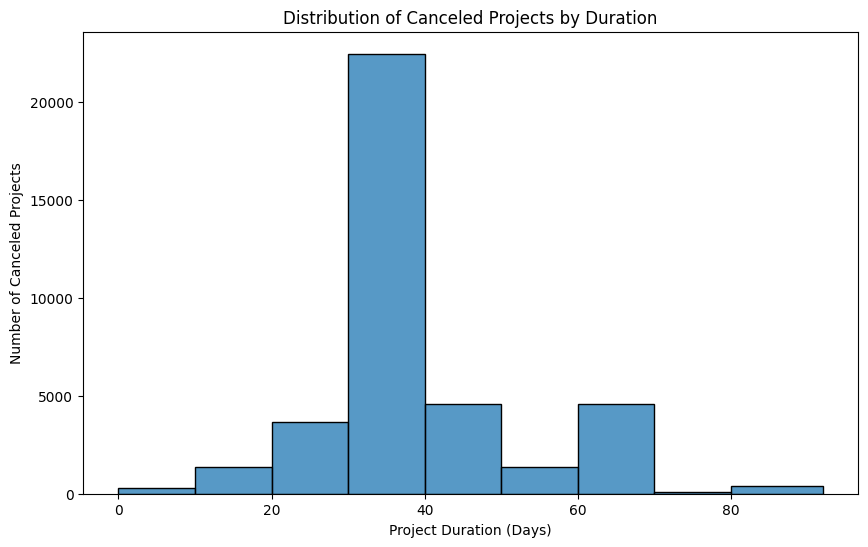

In [46]:
# Plot distribution of projects with state 'Canceled' vs 'Project_Duration_Days' in bins of 30, 60 and 90 days in baseline data
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(data=baseline_data[baseline_data['State'] == 'Canceled'], x='Project_Duration_Days', bins=[0,10,20,30,40,50,60,70,80,92])
plt.xlabel('Project Duration (Days)')
plt.ylabel('Number of Canceled Projects')
plt.title('Distribution of Canceled Projects by Duration')
plt.show()

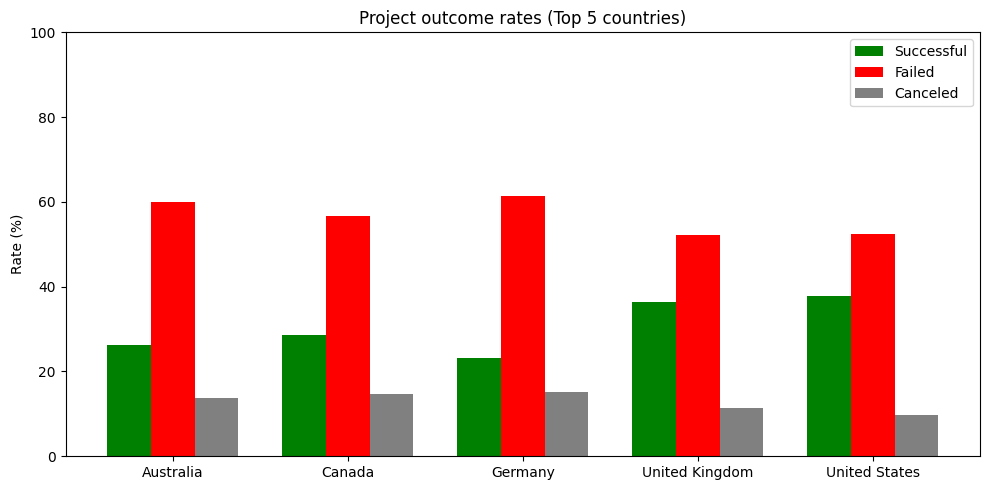

In [47]:
# Plot the distribution of different project outcomes (column 'State') for each 'Country' in percent
# df = your dataframe
df = baseline_data  # or whatever your df is called

# --- 1) Top 5 countries (most projects) ---
top5 = df["Country"].value_counts().head(5).index

# --- 2) Count states per country (only top5) ---
counts = (
    df[df["Country"].isin(top5)]
    .groupby(["Country", "State"])
    .size()
    .unstack(fill_value=0)
)

# ensure consistent order + missing columns handled
state_order = ["Successful", "Failed", "Canceled"]
counts = counts.reindex(columns=state_order, fill_value=0)

# --- 3) Convert to rates (%) ---
rates = counts.div(counts.sum(axis=1), axis=0) * 100

# --- 4) Grouped bar plot ---
x = np.arange(len(rates.index))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width, rates["Successful"], width, label="Successful", color="green")
ax.bar(x,         rates["Failed"],  width, label="Failed",  color="red")
ax.bar(x + width, rates["Canceled"],width, label="Canceled",color="gray")
ax.set_xticks(x)
ax.set_xticklabels(rates.index, rotation=0)
ax.set_ylabel("Rate (%)")
ax.set_title("Project outcome rates (Top 5 countries)")
ax.set_ylim(0, 100)
ax.legend()

plt.tight_layout()
plt.show()

Keep feature 'Country' since the distribution of 'State' is different depending on the country. Next action: OneHotEncoding in order to enhance model performance.

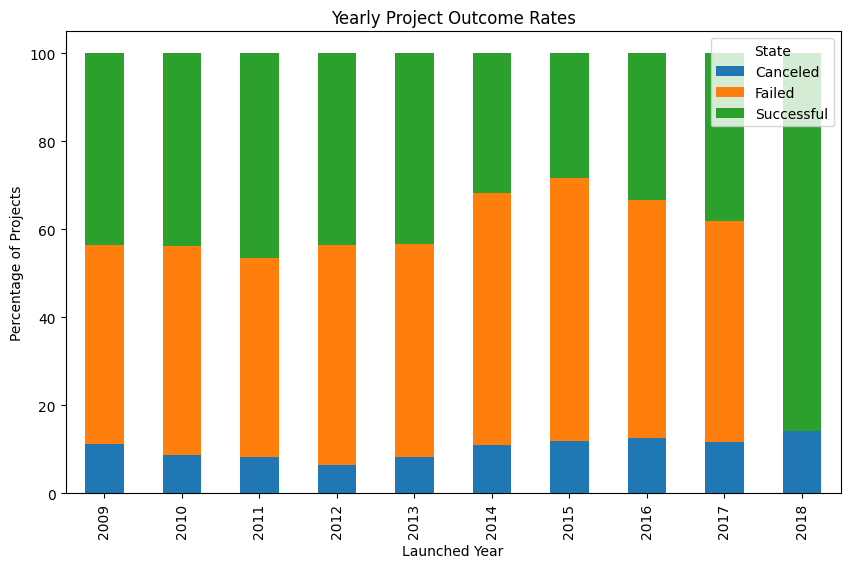

In [48]:
# Check success rates over the course of different years
baseline_data['Launched_Year'] = baseline_data['Launched'].dt.year
yearly_success_rates = baseline_data.groupby('Launched_Year')['State'].value_counts(normalize=True).unstack().fillna(0) * 100
yearly_success_rates.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Launched Year')
plt.ylabel('Percentage of Projects')
plt.title('Yearly Project Outcome Rates')
plt.show()

In [49]:
# check number of projects in Launched = 2018
baseline_data[baseline_data['Launched_Year'] == 2018].shape[0]

14

We observe that there is a high success rate in 2018. This is due to the relatively low number of projects launched in that yera (14). Since this subset does not really impact the overall data we decided drop these rows.

In [50]:
# Drop rows with 'Launched' = 2018 in both datasets
baseline_data = baseline_data[baseline_data['Launched'] != 2018]
advanced_data = advanced_data[advanced_data['Launched'] != 2018]

Based on the graph above we observe that there is no significant difference in the success rate over the course of the years. Therefore, it does not help us make predictions and does not add value when building the model.

In [51]:
# delete columns 'Launched', 'Launched_Year' and 'Deadline' in both datasets
baseline_data = baseline_data.drop(columns=['Launched', 'Launched_Year', 'Deadline'])
advanced_data = advanced_data.drop(columns=['Launched', 'Deadline'])

In [52]:
# Check baseline_data after cleaning
baseline_data.head()

,Name,Category,Country,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,United States,1000,625,Failed,62.50,40
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,United States,80000,22,Failed,0.03,88
2,drawing for dollars,Art,United States,20,35,Successful,175.00,9
3,Offline Wikipedia iPhone app,Technology,United States,99,145,Successful,146.46,80
4,Pantshirts,Fashion,United States,1900,387,Failed,20.37,29


In [54]:
# Check advanced_data after cleaning
advanced_data.head()

,Name,Category,Subcategory,Country,Goal,Pledged,Backers,State,Goal_Fulfillment,Project_Duration_Days
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,1000,625,30,Failed,62.50,40
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,80000,22,3,Failed,0.03,88
2,drawing for dollars,Art,Illustration,United States,20,35,3,Successful,175.00,9
3,Offline Wikipedia iPhone app,Technology,Software,United States,99,145,25,Successful,146.46,80
4,Pantshirts,Fashion,Fashion,United States,1900,387,10,Failed,20.37,29


Open topics:
- Category encoding - open
- Country encoding - Imbalance 70% USA? - open
- State Encoding - open
- Do we use the column "Names" and if yes, how? - open
- Scaling
- Target metric

In [ ]:
# OneHotEncoding for column 'Country' in baseline_data